In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"res2dinv_inputs/ERT_western_perpendicular_gps.Dat")
data

11/06/24 - 10:39:18 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 48 data: 565, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

11/06/24 - 10:39:21 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
11/06/24 - 10:39:24 - pyGIMLi - INFO - Save RVector binary
11/06/24 - 10:39:24 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3218854033757721306
11/06/24 - 10:39:24 - pyGIMLi - INFO - Save RVector binary
11/06/24 - 10:39:24 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2678959599470936472


565 [31.57943488532237,...,30.390972206649042]

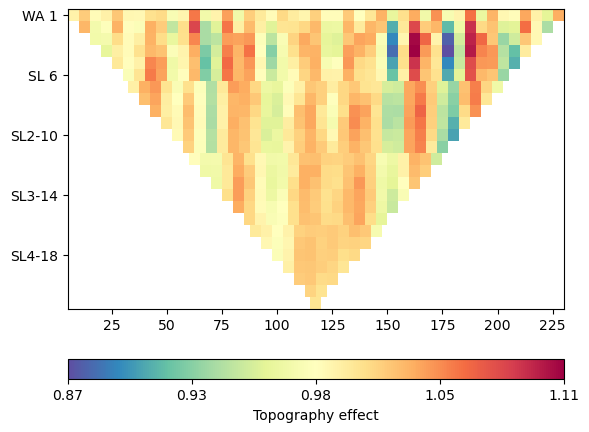

In [4]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1db4f97c890>)

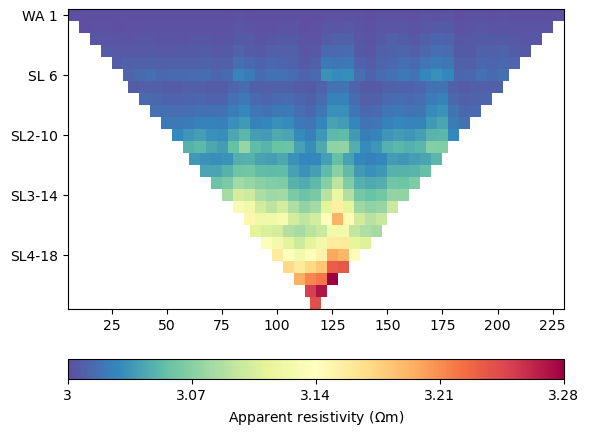

In [5]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1db4f9b3890>)

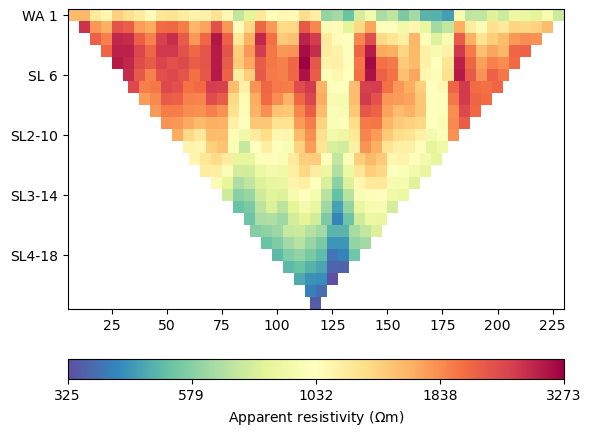

In [6]:
ert.showData(data)

11/06/24 - 10:39:36 - pyGIMLi - INFO - Found 2 regions.
11/06/24 - 10:39:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/06/24 - 10:39:36 - pyGIMLi - INFO - Found 2 regions.
11/06/24 - 10:39:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/06/24 - 10:39:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/06/24 - 10:39:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/06/24 - 10:39:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2575 Cells: 4792 Boundaries: 3772
11/06/24 - 10:39:36 - pyGIMLi - INFO - Use median(data values)=1291.2
11/06/24 - 10:39:36 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
11/06/24 - 10:39:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001DB0EEE7B00>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001DB0EF8D170>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001DB5313E390>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  258.50
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   86.26 (dPhi = 65.59%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   48.35 (dPhi = 41.60%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.51 (dPhi = 88.02%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.45 (dPhi = 0.96%) lam: 10.0
###############

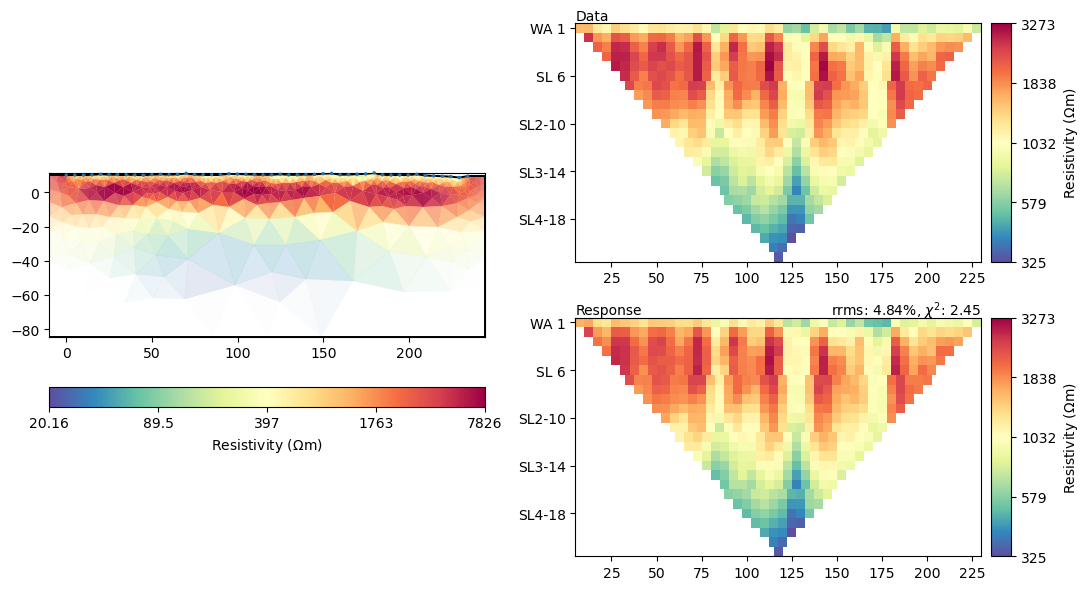

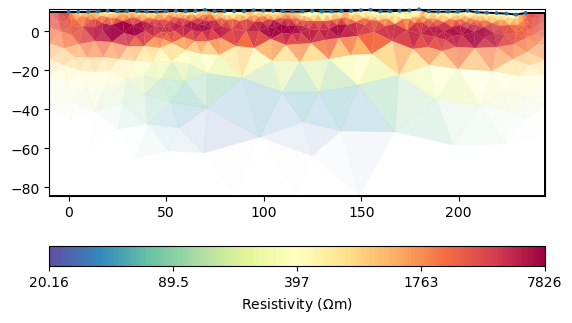

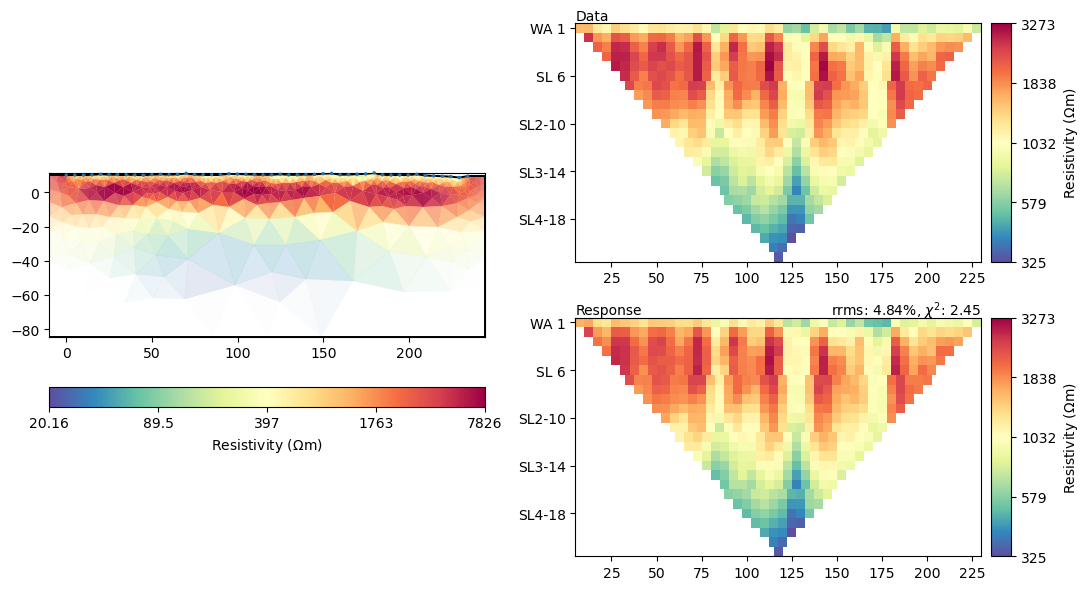

In [7]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10)

mgr.showResult()
mgr.showResultAndFit()

21/05/24 - 13:39:30 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

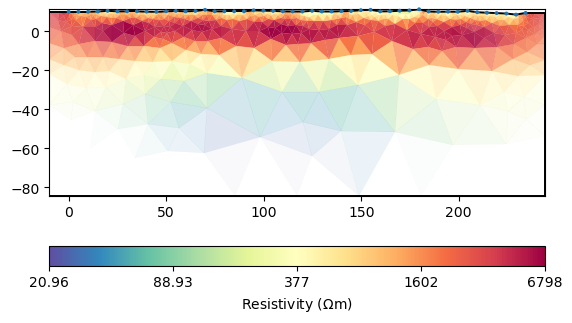

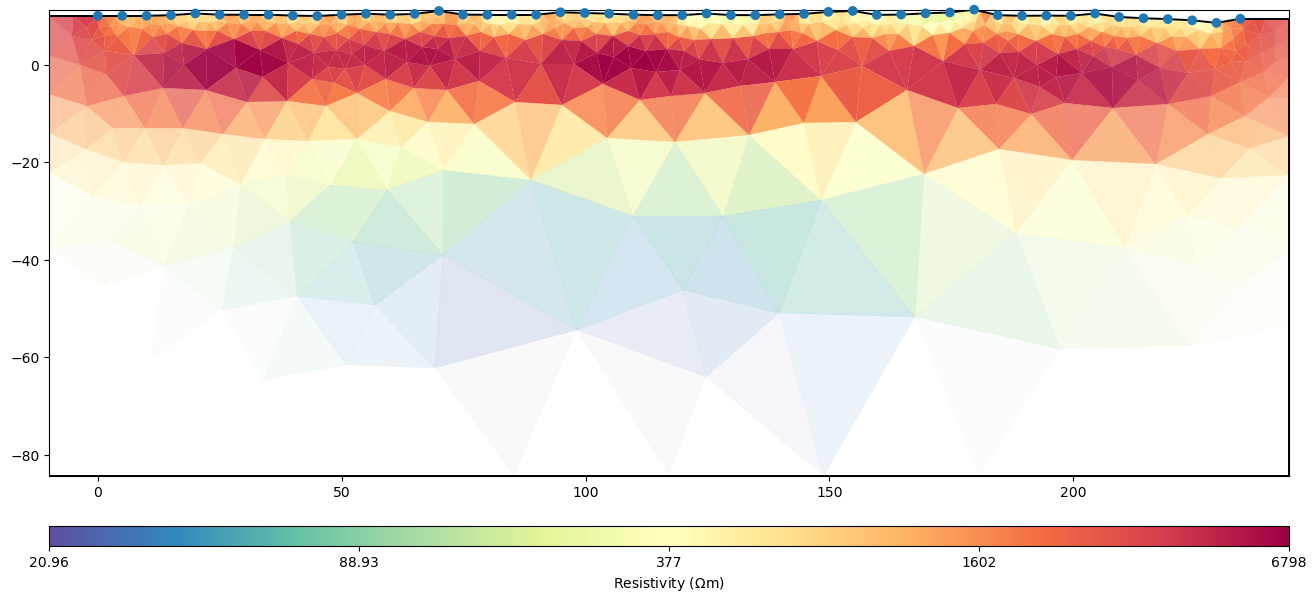

In [12]:
mgr.showResult(cMap="Spectral_r", logScale=True)
mgr.saveResult(dir+ 'pygimli/all_inversions')

(-50.0, 12.284568364548335)

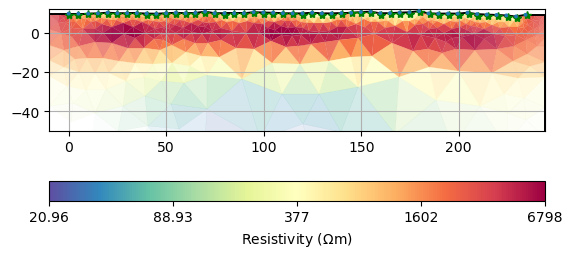

In [11]:


AL = np.loadtxt(dir + "pygimli/AL_western_parallel_to_shore.txt")

x_AL = AL[:, 0]
z_AL = AL[:, 1]

ax, cb = mgr.showResult()
#ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g*', linewidth=0.5)
ax.grid(True)
ax.set_ylim(-50)